In [1]:
from csoundengine.offline import OfflineEngine


In [2]:

e = OfflineEngine()

--Csound version 7.0 (double samples) May 14 2025
[commit: ba226ccf9e9d38cd4516498e6ff7d59ba734b5e1]
libsndfile-1.2.2
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-mikvzun3.wav (WAV)
SECTION 1:


In [3]:
e.hasBusSupport()

False

In [4]:
foo = r'''
instr foo
  ibus = p4
  ifreq = busin:i(ibus)
  prints "foo, ibus: %d, ifreq: %d\n", ibus, ifreq
  a0 oscili 0.1, ifreq
  outch 1, a0
endin
'''

In [5]:
e.compile(foo)


error:  Unable to find opcode with name: busin

Parsing failed due to syntax errors
Stopping on parser failure


In [6]:
e.addBusSupport()

In [7]:
e.compile(foo)


In [8]:
bus = e.assignBus(value=1000)

In [9]:
e.sched('foo', 1, 2, bus)

'foo'

In [10]:
e.writeBus(bus, value=2000, delay=0.)

foo, ibus: 0, ifreq: 1000
resetting Csound instance
		   overall amps:  0.10000  0.00000
	   overall samples out of range:        0        0
0 errors in performance
512 1024 sample blks of shorts written to /tmp/csoundengine-mikvzun3.wav (WAV)


RenderJob(outfile='/tmp/csoundengine-mikvzun3.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=None)
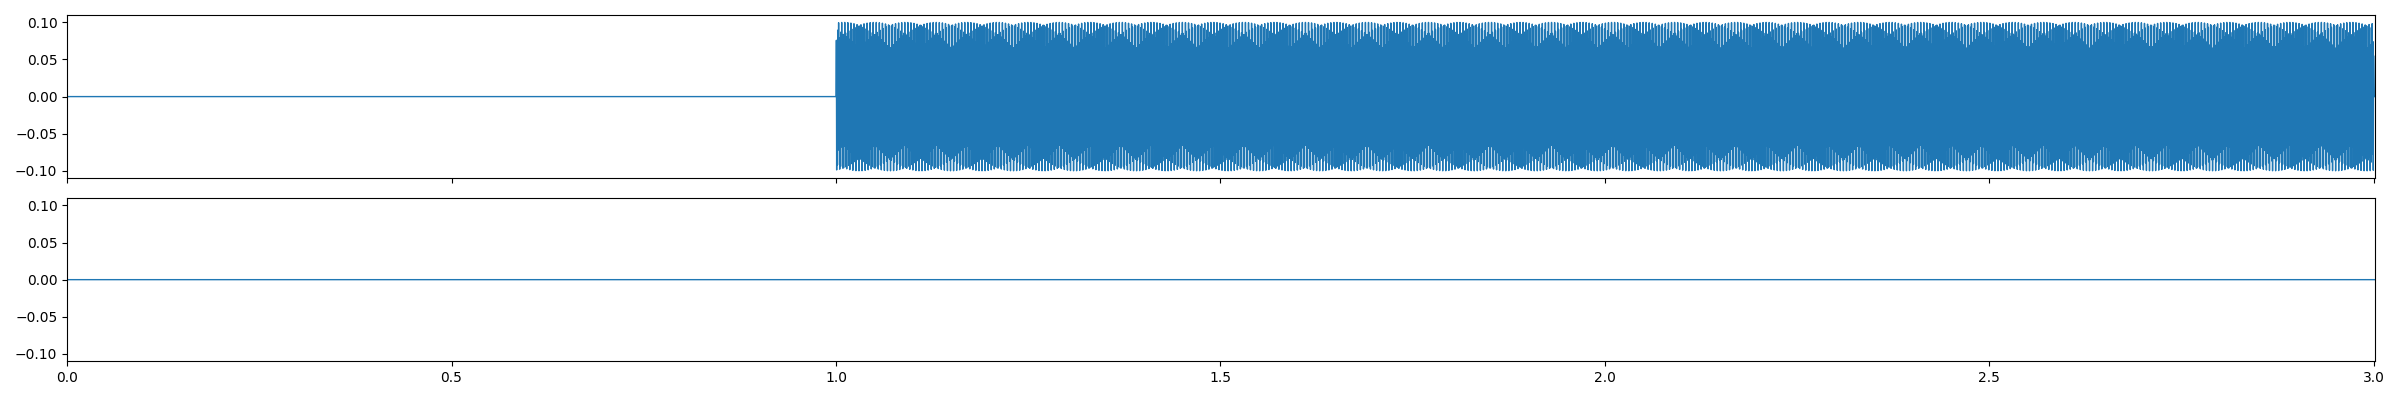

In [11]:
e.stop()

In [14]:
csd = e.generateCsd()
csd.render()


RenderJob(outfile='/tmp/csoundengine-v0am4_0f.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=<Popen: returncode: None args: ['/usr/local/bin/csound', '-o', '/tmp/csounde...>)

In [13]:
print(csd.dump())

<CsoundSynthesizer>
<CsOptions>
-d
--messagelevel=0
--m-amps=0
--m-range=0
--format=float
</CsOptions>

<CsInstruments>

sr     = 44100
ksmps  = 64
0dbfs  = 1
A4     = 442
nchnls = 2
nchnls_i = 0
; ----- global code




gi__responses       ftgen  1, 0, 2000, -2, 0
gi__tokenToInstrnum ftgen 2, 0, 9999, -2, 0
gi__soundfontIndexes dict_new "str:float"
gi__soundfontIndexCounter init 1000
gi__builtinInstrs dict_new "str:float", "notifyDealloc", 1  /* notifyDealloc */

chn_k "_soundfontPresetCount", 3

; ---------------------------------
;          builtin-instruments
; ---------------------------------

opcode _panweights, kk, k
    kpos xin
    kampL = bpf:k(kpos, 0, 1.4142, 0.5, 1, 1, 0)
    kampR = bpf:k(kpos, 0, 0,      0.5, 1, 1, 1.4142)
    xout kampL, kampR; inum nstrnum Sname
endop

opcode namedinstrtofrac, i, S
    ; similar to nametoinstrnum but takes the fractional part into account
    ; given "foo.003", if foo is instr 35, then this returns 35.003
    Sname xin
    indx strinde